In [102]:
import nltk

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import pandas as pd
import string
import seaborn as sns

In [103]:
df = pd.read_csv("Datasets/MainCall.csv", sep=",", names=["label","message"])
df.head(100)

,label,message
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...
...,...,...
95,normal,Its a part of checking IQ.
96,normal,"Sorry my roommates took forever, it's ok if I ..."
97,normal,I plan to give on this month end.
98,normal,Wah lucky man... Then can save money... Hee...


In [104]:
df.shape

(5925, 2)

In [105]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5925 entries, 0 to 5924
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5925 non-null   object
 1   message  5925 non-null   object
dtypes: object(2)
memory usage: 92.7+ KB


,label,message
count,5925,5925
unique,2,5610
top,normal,"Sorry, I'll call later"
freq,5287,25


In [106]:
df.groupby('label').describe()


message                                                               
         count unique                                                top freq
label                                                                        
fraud      638    597  Camera - You are awarded a SiPix Digital Camer...    3
normal    5287   5014                             Sorry, I'll call later   25

# Feature Extraction

In [107]:
df["Length"] = df["message"].apply(len)
df.head(10)

,label,message,Length
0,fraud,"hello, i m bank manager of SBI, ur debit card ...",97
1,fraud,Todays Vodafone numbers ending with 4882 are s...,148
2,normal,Please don't say like that. Hi hi hi,36
3,normal,Thank you!,10
4,normal,Oh that was a forwarded message. I thought you...,63
5,normal,Got it. Seventeen pounds for seven hundred ml ...,56
6,normal,Me and him so funny...,22
7,normal,"Sweetheart, hope you are not having that kind ...",100
8,normal,When you login date time... Dad fetching you h...,54
9,normal,"What will we do in the shower, baby?",36


C:\Users\US\AppData\Local\Temp\ipykernel_3448\3228757989.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Length"], bins=30);


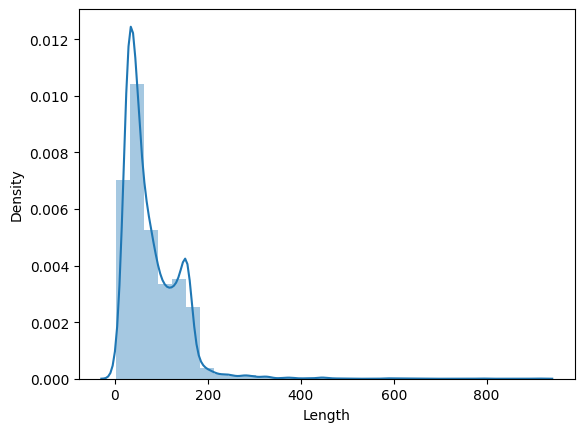

In [108]:
sns.distplot(df["Length"], bins=30);
#gives length of message(average length)

In [109]:
# max length of message
df["Length"].max()

910

In [110]:
df[df["Length"]==910]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<Axes: xlabel='label', ylabel='Length'>

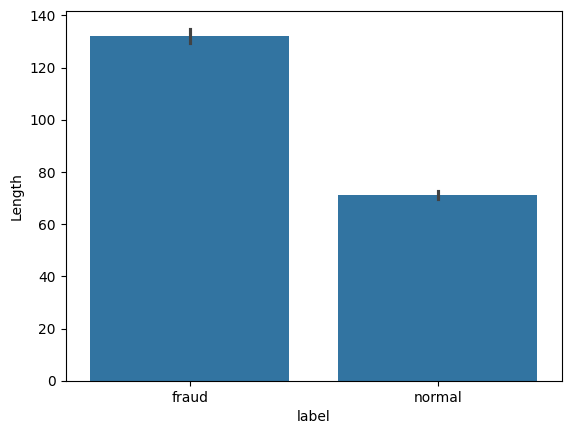

In [111]:
sns.barplot(x='label', y='Length', data=df)

array([<Axes: title={'center': 'fraud'}>,
       <Axes: title={'center': 'normal'}>], dtype=object)

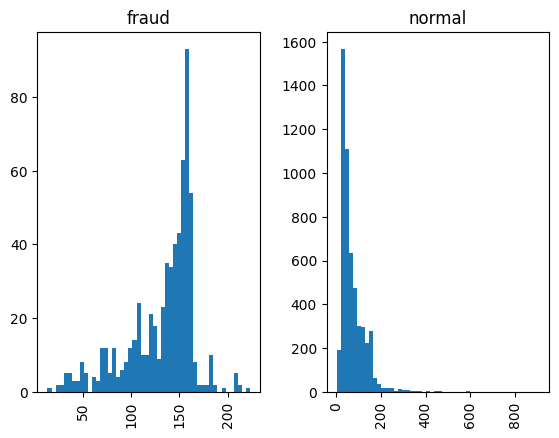

In [112]:
df.hist(column='Length',by='label', bins=50)

# Remove punctuations

In [113]:
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():
            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words
        

In [114]:

# use to below command to download stopwords after downloading nltk


# nltk.download("stopwords")

In [115]:
mess = 'Sample message! Notice: it has punctuation.'
obj = PreProcessText()
words = obj.token_words(mess)
print(words)

['Sample', 'message', 'Notice', 'punctuation']


In [116]:
df["message"].head(4).apply(obj.token_words)

0    [hello, bank, manager, SBI, ur, debit, card, e...
1    [Todays, Vodafone, numbers, ending, 4882, sele...
2                [Please, dont, say, like, Hi, hi, hi]
3                                              [Thank]
Name: message, dtype: object

# Vectorization

In [117]:
bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(df["message"])

In [118]:
messages_bow = bow_transformer.transform(df["message"])

In [119]:
print("Shape of sparese matrix {}".format(messages_bow.shape))

Shape of sparese matrix (5925, 11300)


In [120]:
# erm Frequency - Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents

# Converted word count into TFIDF think this a weight

In [121]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

# Model

In [122]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
# MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice).

In [124]:
model = MultinomialNB().fit(messages_tfidf,df["label"])

In [132]:
# prediction
all_predictions = model.predict(messages_tfidf)
pred = pd.DataFrame(data=all_predictions)

pred.head(20)

,0
0,normal
1,fraud
2,normal
3,normal
4,normal
5,normal
6,normal
7,normal
8,normal
9,normal


In [131]:
# true value
df["label"].head(20)

0      fraud
1      fraud
2     normal
3     normal
4     normal
5     normal
6     normal
7     normal
8     normal
9     normal
10    normal
11    normal
12    normal
13    normal
14    normal
15    normal
16    normal
17    normal
18    normal
19     fraud
Name: label, dtype: object

In [127]:
# input
input_message=("You have won ?1,000 cash or a ?2,000 prize! To claim, call 09050000327")
# pre process
obj=PreProcessText()
transform_message=obj.token_words(input_message)
# vectorise
# bow_transformer = CountVectorizer(analyzer=obj.token_words).fit(transform_message)

vector_input=bow_transformer.transform([transform_message])
# tfidf_transformer.transform([transform_message])
# predict 
result=model.predict(vector_input)[0]
print(result)

normal


In [128]:
bow_transformer.transform([transform_message])

<1x11300 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>